In [1]:
import pandas as pd

# Caminho do arquivo
caminho_arquivo = 'Drone_2025 Experiments 2025-table.csv'

# Ler a planilha, pulando as 6 primeiras linhas (índices 0 a 5)
df = pd.read_csv(caminho_arquivo, sep=',', skiprows=6)

# Exibir as primeiras linhas da tabela
print(df.head)

<bound method NDFrame.head of        [run number]  Battery_Gain  Policy  Battery_consumption  \
0                 2           100       0                   10   
1                 1            50       0                   10   
2                 6           100       0                   15   
3                 5            50       0                   15   
4                 9            50       0                   10   
...             ...           ...     ...                  ...   
10235         10223            50       2                   15   
10236         10236           100       2                   10   
10237         10235            50       2                   10   
10238         10240           100       2                   15   
10239         10239            50       2                   15   

       number-strategies  p2_upperlimit  memory-size  p2_lowerlimit  drones  \
0                      2             70            2             25      50   
1                  

In [2]:
df['rationumber'] = df['count turtles'] / df['drones']
df['ratioticks'] = df['ticks'] / 1500
print(df)

       [run number]  Battery_Gain  Policy  Battery_consumption  \
0                 2           100       0                   10   
1                 1            50       0                   10   
2                 6           100       0                   15   
3                 5            50       0                   15   
4                 9            50       0                   10   
...             ...           ...     ...                  ...   
10235         10223            50       2                   15   
10236         10236           100       2                   10   
10237         10235            50       2                   10   
10238         10240           100       2                   15   
10239         10239            50       2                   15   

       number-strategies  p2_upperlimit  memory-size  p2_lowerlimit  drones  \
0                      2             70            2             25      50   
1                      2             70          

In [3]:
df2 = df.drop(['[step]', 'count turtles','ticks' ], axis=1)

df2

,[run number],Battery_Gain,Policy,Battery_consumption,number-strategies,p2_upperlimit,memory-size,p2_lowerlimit,drones,Battery_Consumption_SD,overcrowding-threshold,rationumber,ratioticks
0,2,100,0,10,2,70,2,25,50,0.0,30,1.0,1.0
1,1,50,0,10,2,70,2,25,50,0.0,30,1.0,1.0
2,6,100,0,15,2,70,2,25,50,0.0,30,1.0,1.0
3,5,50,0,15,2,70,2,25,50,0.0,30,1.0,1.0
4,9,50,0,10,9,70,2,25,50,0.0,30,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10223,50,2,15,9,70,9,50,100,0.1,60,1.0,1.0
10236,10236,100,2,10,9,90,9,50,100,0.1,60,1.0,1.0
10237,10235,50,2,10,9,90,9,50,100,0.1,60,1.0,1.0
10238,10240,100,2,15,9,90,9,50,100,0.1,60,1.0,1.0


In [4]:
df2.rename(columns={
    '[run number]': 'rep',
    'Battery_Gain': 'BG',
    'Policy': 'PL',
    'Battery_consumption': 'BC',
    'number-strategies': 'K',
    'p2_upperlimit': 'UP',
    'memory-size': 'M',
    'p2_lowerlimit': 'LW',
    'drones': 'QTY',
    'Battery_Consumption_SD': 'SD',
    'overcrowding-threshold': 'B',
    'rationumber': 'Y1',
    'ratioticks': 'Y2'
}, inplace=True)

df2

,rep,BG,PL,BC,K,UP,M,LW,QTY,SD,B,Y1,Y2
0,2,100,0,10,2,70,2,25,50,0.0,30,1.0,1.0
1,1,50,0,10,2,70,2,25,50,0.0,30,1.0,1.0
2,6,100,0,15,2,70,2,25,50,0.0,30,1.0,1.0
3,5,50,0,15,2,70,2,25,50,0.0,30,1.0,1.0
4,9,50,0,10,9,70,2,25,50,0.0,30,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10223,50,2,15,9,70,9,50,100,0.1,60,1.0,1.0
10236,10236,100,2,10,9,90,9,50,100,0.1,60,1.0,1.0
10237,10235,50,2,10,9,90,9,50,100,0.1,60,1.0,1.0
10238,10240,100,2,15,9,90,9,50,100,0.1,60,1.0,1.0


In [5]:
df2["BG"] = df2["BG"].replace({50:0, 100:1 })
df2["PL"] = df2["PL"].replace({0:0, 2:1 })
df2["BC"] = df2["BC"].replace({10:0, 15:1 })
df2["K"] = df2["K"].replace({2:0, 9:1 })
df2["UP"] = df2["UP"].replace({70:0, 90:1 })
df2["M"] = df2["M"].replace({2:0, 9:1 })
df2["LW"] = df2["LW"].replace({25:0, 50:1 })
df2["QTY"] = df2["QTY"].replace({50:0, 100:1 })
df2["SD"] = df2["SD"].replace({0:0, 0.1:1 }).astype(int)
df2["B"] = df2["B"].replace({30:0, 60:1 })

df2



,rep,BG,PL,BC,K,UP,M,LW,QTY,SD,B,Y1,Y2
0,2,1,0,0,0,0,0,0,0,0,0,1.0,1.0
1,1,0,0,0,0,0,0,0,0,0,0,1.0,1.0
2,6,1,0,1,0,0,0,0,0,0,0,1.0,1.0
3,5,0,0,1,0,0,0,0,0,0,0,1.0,1.0
4,9,0,0,0,1,0,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10223,0,1,1,1,0,1,1,1,1,1,1.0,1.0
10236,10236,1,1,0,1,1,1,1,1,1,1,1.0,1.0
10237,10235,0,1,0,1,1,1,1,1,1,1,1.0,1.0
10238,10240,1,1,1,1,1,1,1,1,1,1,1.0,1.0


Avaliar resultados para politica EFBP

<Axes: >

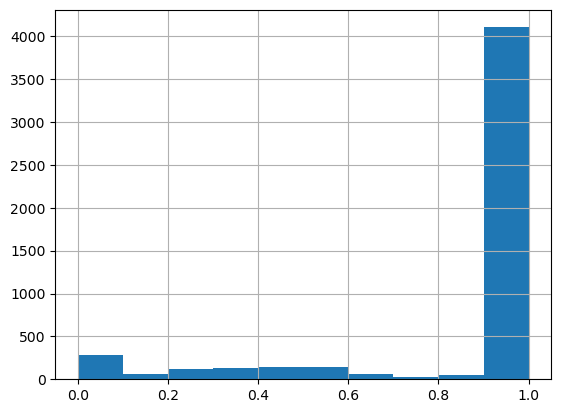

In [6]:
df_filtrado = df2[df2['PL'] == 1]

df_filtrado = df_filtrado.drop('PL', axis=1)

df_filtrado["Y1"].describe()

df_filtrado["Y1"].hist()


In [7]:
df_filtrado['Y1'].describe()

count    5120.000000
mean        0.865531
std         0.289408
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Y1, dtype: float64

In [8]:
# Onde Y1 < 1
df_y1_menor = df_filtrado[df_filtrado['Y1'] < 1]

df_y1_menor['Y1'].describe()


count    1109.000000
mean        0.379188
std         0.291137
min         0.000000
25%         0.080000
50%         0.370000
75%         0.560000
max         0.990000
Name: Y1, dtype: float64

In [10]:
print("Casos com Y1 < 1:")
print(df_y1_menor[['rep', 'BG', 'BC', 'K', 'UP', 'M', 'LW', 'QTY', 'SD', 'B', 'Y1']])



Casos com Y1 < 1:
         rep  BG  BC  K  UP  M  LW  QTY  SD  B    Y1
6          8   1   1  0   0  0   0    0   0  0  0.60
7          7   0   1  0   0  0   0    0   0  0  0.32
11        15   0   1  1   0  0   0    0   0  0  0.02
14        16   1   1  1   0  0   0    0   0  0  0.12
20        23   0   1  0   1  0   0    0   0  0  0.38
...      ...  ..  .. ..  .. ..  ..  ...  .. ..   ...
10157  10151   0   1  0   0  1   0    1   1  1  0.99
10160  10168   1   1  0   1  1   0    1   1  1  0.50
10162  10167   0   1  0   1  1   0    1   1  1  0.56
10184  10175   0   1  1   1  1   0    1   1  1  0.12
10223  10176   1   1  1   1  1   0    1   1  1  0.83

[1109 rows x 11 columns]


In [11]:
df_y1_menor.groupby(['BG', 'BC', 'K', 'UP', 'M', 'LW', 'QTY', 'SD', 'B']).size().reset_index(name='count')

,BG,BC,K,UP,M,LW,QTY,SD,B,count
0,0,1,0,0,0,0,0,0,0,10
1,0,1,0,0,0,0,0,0,1,10
2,0,1,0,0,0,0,0,1,0,10
3,0,1,0,0,0,0,0,1,1,7
4,0,1,0,0,0,0,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...
113,1,1,1,1,1,0,0,1,1,10
114,1,1,1,1,1,0,1,0,0,10
115,1,1,1,1,1,0,1,0,1,7
116,1,1,1,1,1,0,1,1,0,10


In [12]:
#Variavel binaria de evento
df_filtrado['evento_y1'] = (df_filtrado['Y1'] < 1).astype(int)
df_filtrado['evento_y2'] = (df_filtrado['Y2'] < 1).astype(int)



In [27]:
# Lista das 9 variáveis binárias
variaveis = ['B', 'BG', 'K','LW', 'UP', 'M', 'QTY', 'SD', "BC"]
from sklearn.ensemble import RandomForestClassifier

X = df_filtrado[variaveis]
y = df_filtrado['evento_y1']

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X, y)

importancias = pd.Series(modelo.feature_importances_, index=variaveis)


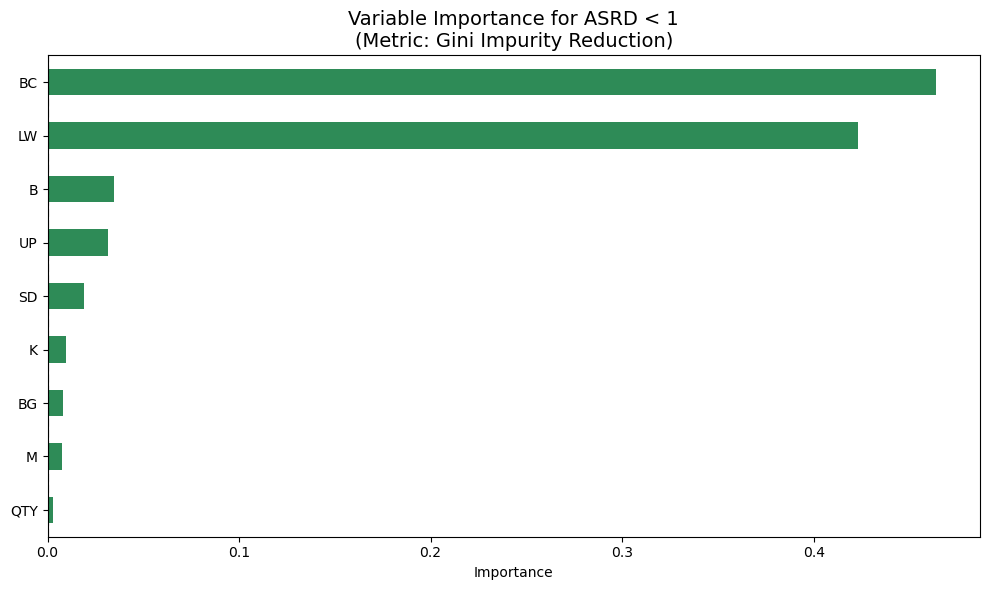

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
importancias.sort_values().plot(kind='barh', color='seagreen')

plt.axvline(x=0, color='black', linestyle='--')
plt.title('Variable Importance for ASRD < 1\n(Metric: Gini Impurity Reduction)', fontsize=14)
plt.xlabel('Importance')



plt.tight_layout()
plt.show()